In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
etsy = pd.read_csv("etsy_cleaned_finalV3.csv")

In [3]:
etsy.columns

Index(['business_name', 'seller_name', 'item_name', 'sale_count',
       'price_current', 'revenue', 'price_original', 'discount',
       'discount_percentage', 'review_count', 'store_rating',
       'shipping_arrival', 'tagged', 'bestseller', 'popular_now', 'etsy_pick',
       'free_shipping', 'USA', 'State', 'instant_download'],
      dtype='object')

In [9]:
df_corr = etsy[['sale_count','review_count','instant_download']]
df_corr.corr(method ='pearson')

,sale_count,review_count,instant_download
sale_count,1.000000,0.836618,0.196985
review_count,0.836618,1.000000,0.004777
instant_download,0.196985,0.004777,1.000000


In [10]:
df_corr.corr(method ='kendall')

,sale_count,review_count,instant_download
sale_count,1.000000,0.787570,0.184892
review_count,0.787570,1.000000,-0.000483
instant_download,0.184892,-0.000483,1.000000


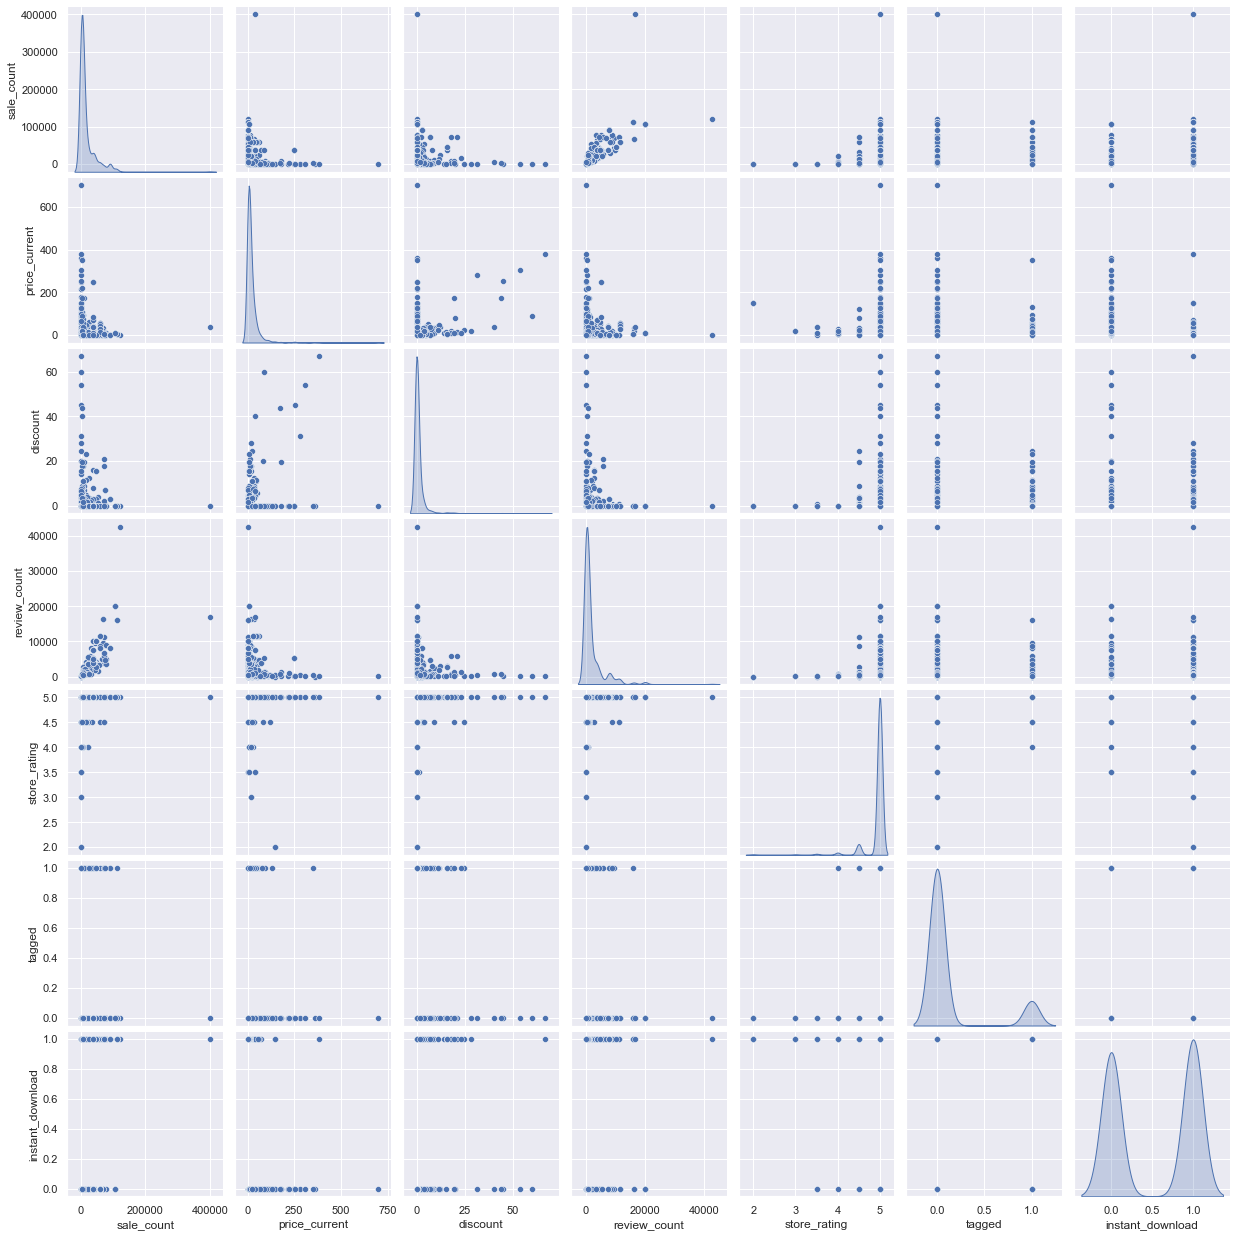

In [124]:
sns.set()
sns.pairplot(etsy[['sale_count','price_current', 'discount', 'review_count', 'store_rating','tagged','instant_download']],diag_kind="kde")

In [129]:
etsy = etsy[etsy['sale_count'] < 300000] 

### Linear regression classifier on sale_count 

In [168]:
#X = etsy[['price_current','review_count', 'store_rating','discount','instant_download']]
X = etsy[['review_count', 'instant_download']]
y = etsy['sale_count'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,  random_state=50)

#To scale input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [169]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
score = model.score(X_train_scaled, y_train)
pred_y = model.predict(X_train_scaled)
mse = mean_squared_error(y_train, pred_y) 
print("R2:{0:.3f}, MSE:{1:.3f}, RMSE:{2:.2f}".format(score, mse,np.sqrt(mse)))

#Running model on Test data 
pred_y_test = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, pred_y_test) 
print("MSE on test data")
print("MSE:{0:.3f}, RMSE:{1:.2f}".format(mse_test,np.sqrt(mse_test)))

print(model.coef_, model.intercept_)

R2:0.793, MSE:126827573.866, RMSE:11261.77
MSE on test data
MSE:92194624.034, RMSE:9601.80
[21466.06442524  4903.71177031] 16095.82714740191


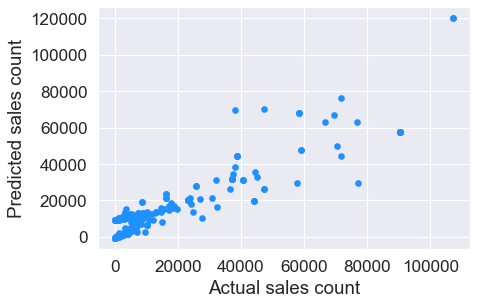

In [171]:
from matplotlib.pyplot import figure
figure(figsize=(6, 4), dpi=80)
plt.scatter(y_test,pred_y_test, color='dodgerblue',linewidth=0.001)
plt.xlabel('Actual sales count')
plt.ylabel('Predicted sales count')
plt.show()

In [133]:
import statsmodels.api as sm
X_train_scaled = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_scaled)
results = model.fit()
print(results.summary())

print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     1798.
Date:                Wed, 10 Nov 2021   Prob (F-statistic):          5.78e-322
Time:                        20:43:55   Log-Likelihood:                -10135.
No. Observations:                 943   AIC:                         2.028e+04
Df Residuals:                     940   BIC:                         2.029e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.61e+04    367.319     43.820      0.0

### Linear regression on log values

In [134]:

X = np.log(etsy[['price_current','review_count', 'store_rating']])
y = np.log(etsy['sale_count'].to_numpy())

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,  random_state=50)


In [135]:
X

,price_current,review_count,store_rating
0,0.912283,2.564949,1.609438
1,3.037354,1.609438,1.609438
2,1.931521,7.489412,1.609438
3,3.037354,1.609438,1.609438
4,2.394252,6.732211,1.609438
...,...,...,...
1175,0.173953,6.100319,1.609438
1176,3.044522,6.437752,1.609438
1177,3.688879,6.792344,1.609438
1178,3.035914,6.643790,1.609438


In [136]:
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
pred_y = model.predict(X_train)
mse = mean_squared_error(y_train, pred_y) 
print("R2:{0:.3f}, MSE:{1:.3f}, RMSE:{2:.2f}".format(score, mse,np.sqrt(mse)))

#Running model on Test data 
pred_y_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, pred_y_test) 
print("MSE on test data")
print("MSE:{0:.3f}, RMSE:{1:.2f}".format(mse_test,np.sqrt(mse_test)))

print(model.coef_, model.intercept_)

R2:0.929, MSE:0.280, RMSE:0.53
MSE on test data
MSE:0.245, RMSE:0.50
[-0.28853782  0.9662885  -1.94094742] 6.103970116193562


In [137]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

print('coefficient of determination:', results.rsquared)
print('adjusted coefficient of determination:', results.rsquared_adj)
print('regression coefficients:', results.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     4076.
Date:                Wed, 10 Nov 2021   Prob (F-statistic):               0.00
Time:                        20:43:55   Log-Likelihood:                -738.14
No. Observations:                 943   AIC:                             1484.
Df Residuals:                     939   BIC:                             1504.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1040      0.474     12.878

### Logistic regression classifier on instant_download 

In [179]:
X = etsy[['sale_count','price_current','review_count', 'store_rating','discount']]
#X = etsy[['sale_count','review_count','discount']]
y = etsy['instant_download']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 42)

In [180]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs',multi_class='auto')
logreg.fit(X_train,y_train)
y_pred2 = logreg.predict(X_test)

acc2 = accuracy_score(y_test,y_pred2)
#print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       108
           1       0.88      0.88      0.88       128

    accuracy                           0.87       236
   macro avg       0.87      0.87      0.87       236
weighted avg       0.87      0.87      0.87       236



Text(0.5, 26.5, 'Predicted Values')

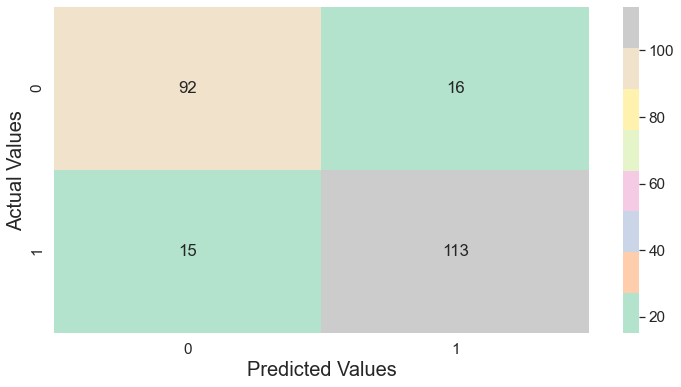

In [182]:
cm=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(12,6))
#plt.title("Confusion Matrix", fontsize = 20)
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d', cmap='Pastel2')
plt.ylabel("Actual Values", fontsize = 20)
plt.xlabel("Predicted Values", fontsize = 20)
#plt.savefig('confusion_matrix.png